In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report





In [10]:
df = pd.read_excel('/content/drive/MyDrive/Agentic Models Course/cancer-risk-factors (CODECADEMY).xlsx')

In [11]:
df.head()

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium
4,LU0005,Lung,77,1,10,8,3,0,6,0,...,2,10,7,0,0,0,0.498668,25.1,1,Medium


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Columns: 520 entries, Age to Risk_Category
dtypes: float64(1), int64(518), object(1)
memory usage: 2.0+ MB


In [43]:
df=df.drop(columns=['Overall_Risk_Score'], errors='ignore')

In [46]:
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Patient_ID_ST0381', 'Patient_ID_ST0384', 'Patient_ID_ST0386', 'Patient_ID_ST0397', 'Cancer_Type_Colon', 'Cancer_Type_Lung', 'Cancer_Type_Prostate', 'Cancer_Type_Skin', 'Risk_Level_Low', 'Risk_Level_Medium'], axis=1), df['Risk_Level_Medium'], test_size=0.2, random_state=42)

In [49]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred = model_knn.predict(X_test)

In [51]:
#Evaluate the test accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy*100)

Test Accuracy: 82.0


In [52]:
# AdaBoost Classifier
model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print(f"AdaBoost Accuracy: {accuracy_ada * 100:.2f}%")

AdaBoost Accuracy: 100.00%


In [53]:
#Evaluate the test accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy*100)

Test Accuracy: 82.0


In [54]:
#Random Forest
model_rf = RandomForestClassifier(n_estimators=1000)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RF Accuracy:", accuracy_rf*100)

RF Accuracy: 100.0


In [55]:
from sklearn.metrics import classification_report

print("Random Forest Detailed Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Detailed Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        41

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



/tmp/ipython-input-3915670010.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


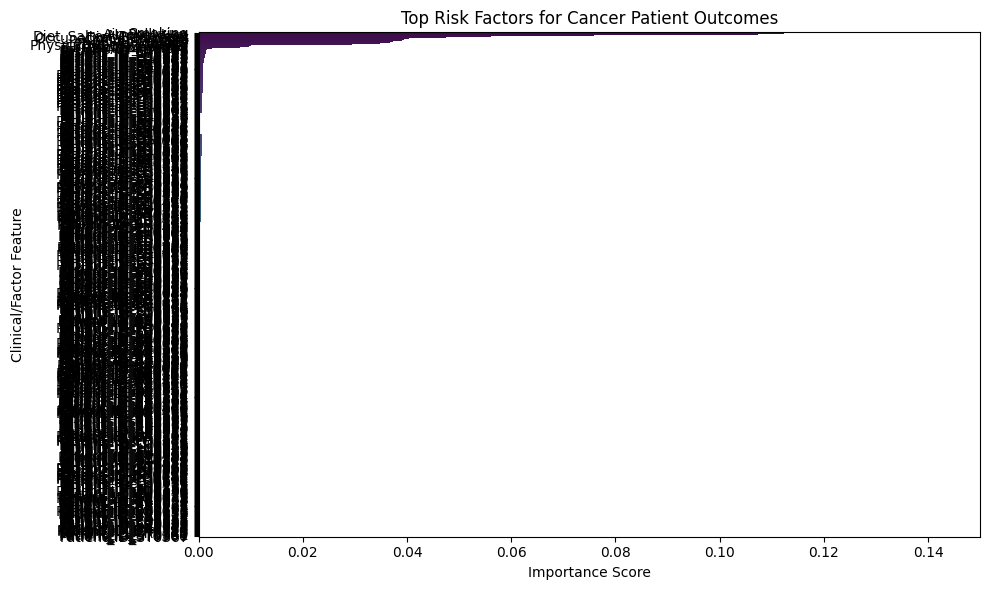

In [56]:
# 1. Prepare the Multi-class Target
# Single 'Target' column that contains 0, 1, or 2 (Low, Medium, High)
# Note: It is best to do this BEFORE get_dummies, but we can reconstruct it:
df['Risk_Category'] = 'High' # Default
df.loc[df['Risk_Level_Low'] == 1, 'Risk_Category'] = 'Low'
df.loc[df['Risk_Level_Medium'] == 1, 'Risk_Category'] = 'Medium'

# 2. Define Features (X) and Target (y)
# Drop all target-related columns and IDs from features to avoid "Data Leakage"
features_to_drop = [
    'Patient_ID_ST0381', 'Patient_ID_ST0384', 'Patient_ID_ST0386', 'Patient_ID_ST0397',
    'Cancer_Type_Colon', 'Cancer_Type_Lung', 'Cancer_Type_Prostate', 'Cancer_Type_Skin',
    'Risk_Level_Low', 'Risk_Level_Medium', 'Risk_Category',
    'Risk_Category_Low', 'Risk_Category_Medium' # Explicitly drop dummified Risk_Category columns
]
X = df.drop(columns=features_to_drop, errors='ignore') # Use errors='ignore' for robustness
y = df['Risk_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Random Forest
model_rf = RandomForestClassifier(n_estimators=1000, random_state=42)
model_rf.fit(X_train, y_train)

# 4. Visualization: Feature Importance
importances = model_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top Risk Factors for Cancer Patient Outcomes')
plt.xlabel('Importance Score')
plt.ylabel('Clinical/Factor Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')

<Figure size 800x600 with 0 Axes>

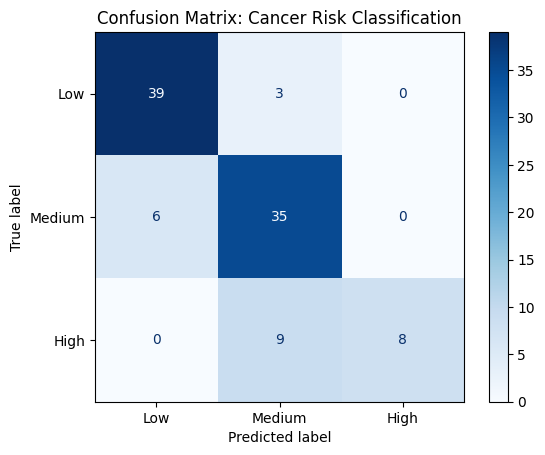

In [57]:


# 1. Generate predictions using your trained Random Forest model
y_pred_rf = model_rf.predict(X_test)

# 2. Define the labels in a logical order (Low -> Medium -> High)
labels = ['Low', 'Medium', 'High']

# 3. Create the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=labels)

# 4. Plot using Seaborn or Scikit-learn's built-in display
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix: Cancer Risk Classification')
plt.show()

In [58]:
# 1. Define the patient data as a dictionary
# Make sure the keys match the column names in X_train exactly!
# This is an example, you would fill in the appropriate values for a new patient.
patient_data = {
    'Age': 62,
    'Gender': 1, # Assuming 1 for Male if Gender_Male implies 1 here
    'Smoking': 10, # Example value, based on your data's range
    'Alcohol_Use': 10,
    'Obesity': 10,
    'Family_History': 0,
    'Diet_Red_Meat': 10,
    'Diet_Salted_Processed': 5,
    'Fruit_Veg_Intake': 6,
    'Physical_Activity': 0,
    'Air_Pollution': 7,
    'Occupational_Hazards': 8,
    'BRCA_Mutation': 0, # Assuming no mutation for this example
    'H_Pylori_Infection': 0,
    'Calcium_Intake': 5,
    'Overall_Risk_Score': 0.85, # This is usually a result, not an input, but needed if part of X_train
    'BMI': 60.5,
    'Physical_Activity_Level': 3,
}

# Add all Patient_ID and Cancer_Type dummy variables, typically set to 0 for a new patient
for col in X_train.columns:
    if col.startswith('Patient_ID_') or col.startswith('Cancer_Type_'):
        patient_data[col] = 0

# 2. Convert to a DataFrame
test_patient = pd.DataFrame([patient_data])

# 3. Ensure the column order matches X_train exactly
test_patient = test_patient[X_train.columns]

# 4. Predict!
result = model_rf.predict(test_patient)
print(f"The predicted risk for this patient is: {result[0]}")

The predicted risk for this patient is: High


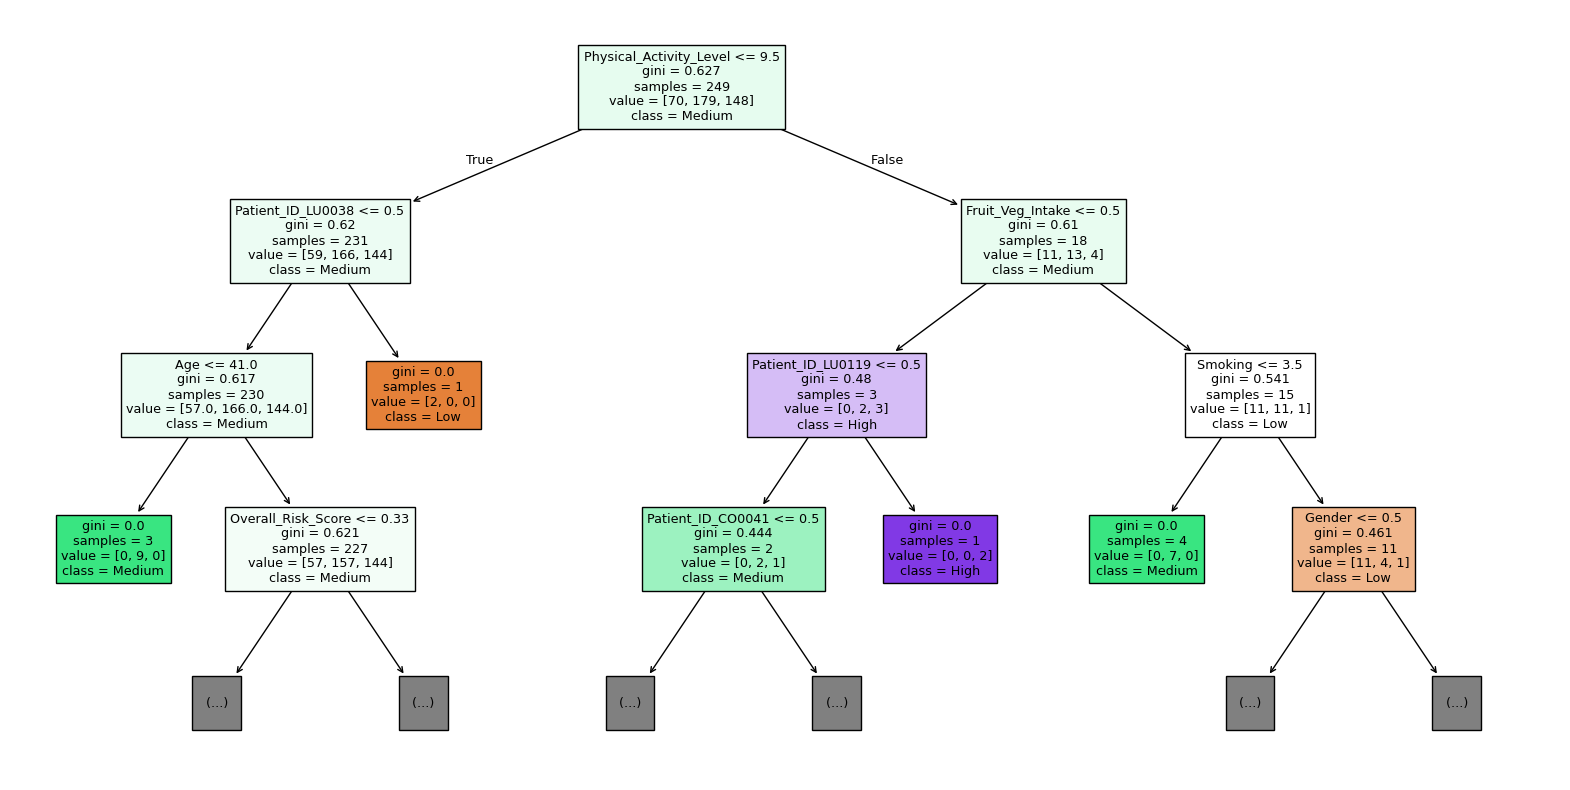

In [ ]:
from sklearn.tree import plot_tree

# Visualize the first tree in your Random Forest
plt.figure(figsize=(20,10))
plot_tree(model_rf.estimators_[0],
          feature_names=X.columns,
          class_names=labels,
          filled=True,
          max_depth=3) # Depth limited so it's readable
plt.show()